In [1]:
#  필요한 라이브러리 불러오기
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
    
import re
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots    
    
    

/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/README.md
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/9812.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/2339.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5404.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/5150.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1624.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/3188.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/7964.csv
/kaggle/input/learnplatform-covid19-impact-on-digital-learni

* What is the picture of digital connectivity and engagement in 2020?  
#product_df.csv & lp_id ---- engagement_df.csv & lp_id   
 
* What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?  
#어떤 product(zoom, ~ ) 를 많이 썼느냐   
  
* How does student engagement with different types of education technology change over the course of the pandemic?  
#366일을 데이터를 다 가지고 있는 district와 366일 미만의 데이터를 가지고 있는 district 구별  


* How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?


* Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?

In [2]:
path = os.getcwd()
print(path)

/kaggle/working


In [3]:
products_df = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
districts_df = pd.read_csv("/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")

districts_df.shape, products_df.shape


((233, 7), (372, 6))

In [4]:
# engagement_data 폴더의 파일 확인
os.listdir("../input/learnplatform-covid19-impact-on-digital-learning/engagement_data")

['6345.csv',
 '9812.csv',
 '2339.csv',
 '5404.csv',
 '5150.csv',
 '1624.csv',
 '3188.csv',
 '7964.csv',
 '2165.csv',
 '9463.csv',
 '9303.csv',
 '2321.csv',
 '8937.csv',
 '1179.csv',
 '7352.csv',
 '1000.csv',
 '6055.csv',
 '1142.csv',
 '6584.csv',
 '9043.csv',
 '5231.csv',
 '3864.csv',
 '1044.csv',
 '1450.csv',
 '3550.csv',
 '6721.csv',
 '2517.csv',
 '2106.csv',
 '4314.csv',
 '7975.csv',
 '6762.csv',
 '2685.csv',
 '7767.csv',
 '4668.csv',
 '4550.csv',
 '1039.csv',
 '9553.csv',
 '7308.csv',
 '2285.csv',
 '3390.csv',
 '3248.csv',
 '4629.csv',
 '1131.csv',
 '5422.csv',
 '7980.csv',
 '4516.csv',
 '8103.csv',
 '8815.csv',
 '5987.csv',
 '5006.csv',
 '3080.csv',
 '2779.csv',
 '2130.csv',
 '3692.csv',
 '3670.csv',
 '7675.csv',
 '4051.csv',
 '7457.csv',
 '4749.csv',
 '8017.csv',
 '4937.csv',
 '8515.csv',
 '1536.csv',
 '5890.csv',
 '2017.csv',
 '9140.csv',
 '1470.csv',
 '8784.csv',
 '6512.csv',
 '6165.csv',
 '3301.csv',
 '8425.csv',
 '4348.csv',
 '7086.csv',
 '2201.csv',
 '8328.csv',
 '8702.csv',

In [5]:
districts_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [7]:
# engagement_data 폴더의 파일 확인
engagement_df= os.listdir("../input/learnplatform-covid19-impact-on-digital-learning/engagement_data")
engagement_df[0:10]

['6345.csv',
 '9812.csv',
 '2339.csv',
 '5404.csv',
 '5150.csv',
 '1624.csv',
 '3188.csv',
 '7964.csv',
 '2165.csv',
 '9463.csv']

In [8]:
engagement_1000_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1000.csv")
engagement_1000_df.head()

,time,lp_id,pct_access,engagement_index
0,2020-01-01,93690.0,0.00,NaN
1,2020-01-01,17941.0,0.03,0.90
2,2020-01-01,65358.0,0.03,1.20
3,2020-01-01,98265.0,0.57,37.79
4,2020-01-01,59257.0,0.00,NaN


### Preprocessing
* dropping 57 school districts with NaN states (57/233 ~ 25%)
* one-hot encoding the product sectors
* splitting up the primary essential function into main and sub category

In [9]:
districts_df.isna().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

In [10]:
# 전체 state 값 
print(districts_df.shape)
districts_df = districts_df[districts_df.state.notna()].reset_index(drop=True)
# state 의 NAN을 뺀다.
print(districts_df.shape)

(233, 7)
(176, 7)


In [11]:
products_df['Sector(s)'].unique()

array(['PreK-12', 'PreK-12; Higher Ed', 'PreK-12; Higher Ed; Corporate',
       nan, 'Corporate', 'Higher Ed; Corporate'], dtype=object)

In [12]:
temp_sectors = products_df['Sector(s)'].str.get_dummies(sep="; ")   # 문자열 값 중에,  세개의 변수를 만들겠다.
temp_sectors.head()

,Corporate,Higher Ed,PreK-12
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,1
4,0,0,1


In [13]:
temp_sectors.columns = [f"sector_{re.sub(' ', '', c)}" for c in temp_sectors.columns]  # 공백을 없애고, 

In [14]:
temp_sectors.columns

Index(['sector_Corporate', 'sector_HigherEd', 'sector_PreK-12'], dtype='object')

In [15]:
products_df = products_df.join(temp_sectors)
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,sector_Corporate,sector_HigherEd,sector_PreK-12
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,0,0,1
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,0,0,1
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",0,0,1
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,0,1,1
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,0,0,1


In [16]:
products_df.drop("Sector(s)", axis=1, inplace=True)
print(products_df.columns)
del temp_sectors

Index(['LP ID', 'URL', 'Product Name', 'Provider/Company Name',
       'Primary Essential Function', 'sector_Corporate', 'sector_HigherEd',
       'sector_PreK-12'],
      dtype='object')


### Primary Essential Function의 LC - Digital~~ 나누기

In [17]:
products_df['pri_function_main'] = products_df['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_df['pri_function_sub'] = products_df['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

In [18]:
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Primary Essential Function,sector_Corporate,sector_HigherEd,sector_PreK-12,pri_function_main,pri_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC - Digital Learning Platforms,0,0,1,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC - Digital Learning Platforms,0,0,1,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC","LC - Sites, Resources & Reference - Games & Si...",0,0,1,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,LC - Digital Learning Platforms,0,1,1,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC - Digital Learning Platforms,0,0,1,LC,Digital Learning Platforms


In [19]:
# Synchronize similar values
products_df['pri_function_sub'] = products_df['pri_function_sub'].replace(
          {'Sites, Resources & References' : 'Sites, Resources & Reference'})
products_df.drop("Primary Essential Function", axis=1, inplace=True)

In [20]:
products_df['pri_function_sub'].unique()

array(['Digital Learning Platforms', 'Sites, Resources & Reference',
       'Courseware & Textbooks', 'Study Tools', 'Teacher Resources',
       'Learning Management Systems (LMS)', 'Content Creation & Curation',
       'Online Course Providers & Technical Skills Development',
       'Classroom Engagement & Instruction', 'School Management Software',
       'Other', 'Data, Analytics & Reporting', 'Virtual Classroom', nan,
       'Career Planning & Job Search', 'Human Resources',
       'Large-Scale & Standardized Testing',
       'Admissions, Enrollment & Rostering',
       'Environmental, Health & Safety (EHS) Compliance'], dtype=object)

In [21]:
products_df[ ['sector_Corporate', 'sector_HigherEd', 'sector_PreK-12',
       'pri_function_main', 'pri_function_sub'] ]

,sector_Corporate,sector_HigherEd,sector_PreK-12,pri_function_main,pri_function_sub
0,0,0,1,LC,Digital Learning Platforms
1,0,0,1,LC,Digital Learning Platforms
2,0,0,1,LC,"Sites, Resources & Reference"
3,0,1,1,LC,Digital Learning Platforms
4,0,0,1,LC,Digital Learning Platforms
...,...,...,...,...,...
367,1,1,1,SDO,Other
368,1,1,1,LC,Content Creation & Curation
369,0,1,1,LC,"Sites, Resources & Reference"
370,0,0,0,NaN,NaN


### engagement_data의 데이터 파일에 district_id를 추가

In [22]:
districts_df.district_id.unique()

array([8815, 4921, 5987, 3710, 7177, 9812, 6584, 1044, 7457, 1904, 5527,
       2257, 7614, 4808, 1877, 2779, 8328, 8539, 9043, 1549, 4051, 7305,
       2167, 6577, 4602, 4936, 4520, 7785, 3668, 7970, 5231, 9589, 8433,
       2165, 2074, 1142, 7964, 8784, 7798, 3550, 1444, 2601, 7660, 9899,
       1742, 4629, 4569, 4949, 6250, 8425, 6418, 1558, 3222, 1772, 5604,
       9007, 8884, 1712, 3412, 2940, 5042, 3692, 4683, 2567, 2321, 7767,
       7308, 5006, 9140, 8902, 5890, 4031, 6640, 6194, 3864, 2598, 5600,
       2991, 2106, 6919, 7980, 2060, 7387, 1000, 5150, 2956, 9553, 1536,
       8937, 1791, 4516, 2872, 2439, 8520, 2130, 3772, 4775, 9778, 5524,
       1470, 5802, 1324, 3160, 2393, 9230, 3248, 8556, 5627, 4550, 7752,
       2729, 4348, 3986, 9537, 1052, 6762, 3670, 1204, 2870, 3558, 1450,
       3080, 2517, 1570, 4668, 6055, 2285, 2172, 7741, 6998, 3322, 4083,
       3936, 7675, 4744, 9478, 7541, 1270, 8076, 6345, 4183, 9357, 5510,
       6104, 3228, 5422, 8127, 3640, 8256, 1857, 54

In [23]:
PATH = "../input/learnplatform-covid19-impact-on-digital-learning/engagement_data"

temp = []

for district in districts_df.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df['district_id'] = district
    temp.append(df)

len(temp)

176

In [24]:

engagement = pd.concat(temp)
engagement = engagement.reset_index(drop=True)
engagement.head()


,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-27,32213.0,100.00,3000.00,8815
1,2020-02-25,90153.0,33.33,2666.67,8815
2,2020-02-25,99916.0,0.00,NaN,8815
3,2020-02-25,28504.0,0.00,NaN,8815
4,2020-02-25,95731.0,33.33,333.33,8815


In [25]:
engagement.tail()

,time,lp_id,pct_access,engagement_index,district_id
17435739,2020-12-31,43009.0,0.02,8.14,7164
17435740,2020-12-31,62984.0,0.00,0.04,7164
17435741,2020-12-31,90014.0,0.00,0.04,7164
17435742,2020-12-31,61945.0,0.29,16.06,7164
17435743,2020-12-31,85975.0,0.03,4.83,7164


* 대부분의 학군에는 366일의 고유 일수가 있습니다.
* 그러나 43개의 학군의 경우, 366일 미만의 고유한 데이터를 사용할 수 있음.
* district_id 3670의 경우, 2020-02-15부터 2020-03-02의 데이터만 사용이 가능.
* district_id 2872의 경우, 2020년 1월의 데이터만 사용 가능하고, 2월과 3월의 각각 1일, 총 2일만 데이터 사용가능

In [26]:
len(engagement.district_id.unique())

176

In [27]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17435744 entries, 0 to 17435743
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 665.1+ MB


In [28]:
# 아무 district 하나 찍어서(3670) 몇개의 time 데이터가 있는지 확인
engagement[engagement['district_id']==3670].time.unique()

# 366일이 아님. 

array(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-03-02'], dtype=object)

### 각 district_id에 대해 사용가능한 날짜 카운트를 히스토그램으로 표현

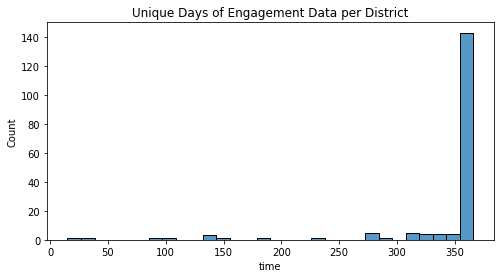

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

sns.histplot(engagement.groupby('district_id').time.nunique(), bins=30)
ax.set_title('Unique Days of Engagement Data per District')
plt.show()

In [30]:
# 앞에서 확인한 engagement를 지우고, 새롭게 만든다.
del engagement

temp = []

for district in districts_df.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    if df.time.nunique() == 366:    # 366일인 것만 추가하겠다. 
        temp.append(df)

engagement = pd.concat(temp)   # 366일인것만 뽑아서 pandas로 찍기 
engagement = engagement.reset_index(drop=True)

In [31]:
districts_df.shape, products_df.shape

((176, 7), (372, 9))

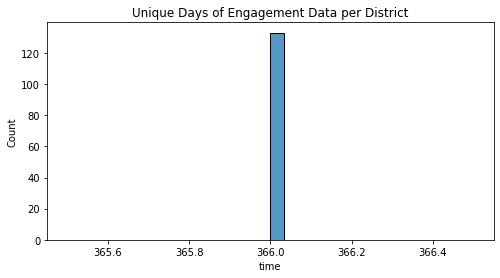

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

sns.histplot(engagement.groupby('district_id').time.nunique(), bins=30)
ax.set_title('Unique Days of Engagement Data per District')
plt.show()

### 전체 2020년이 있는 데이터만 합친다.

* 컬럼명과 파일명 연결시키기

In [33]:
districts_df = districts_df[districts_df.district_id.isin(engagement.district_id.unique())].reset_index(drop=True)
products_df = products_df[products_df['LP ID'].isin(engagement.lp_id.unique())].reset_index(drop=True)

In [34]:
districts_df.shape, products_df.shape

((133, 7), (369, 9))

In [35]:
engagement.time = engagement.time.astype('datetime64[ns]')

### EDA(Exploratory Data Analysis)
* 이용 가능한 학군 확인.
* 학군이 가장 많이 있는 주는 CT(29)와 UT(24)
* 학군이 하나만 있는 주는 (FL, TN, NY, AZ)

In [36]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [37]:
districts_df['state_abbrev'] = districts_df['state'].replace(us_state_abbrev)
districts_df_by_state = districts_df['state_abbrev'].value_counts().to_frame().reset_index(drop=False)
districts_df_by_state.head()

,index,state_abbrev
0,CT,29
1,UT,24
2,MA,17
3,IL,13
4,CA,9


In [38]:
districts_df_by_state.columns = ['state_abbrev', 'num_districts']

fig = go.Figure()
layout = dict(
    title_text = "Number of Available School Districts per State",
    geo_scope='usa',
)

fig.add_trace(
    go.Choropleth(
        locations=districts_df_by_state.state_abbrev,
        zmax=1,
        z = districts_df_by_state.num_districts,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        marker_line_color='white',
        geo='geo',
        colorscale=px.colors.sequential.Teal, 
    )
)
            
fig.update_layout(layout)   
fig.show()

### 'Primary Essential Function'의 열에서 가장 일반적인 범주는 LC(learning & curriculum), 교실 관리(CM)및 학교 및 학군 운영(SDO)

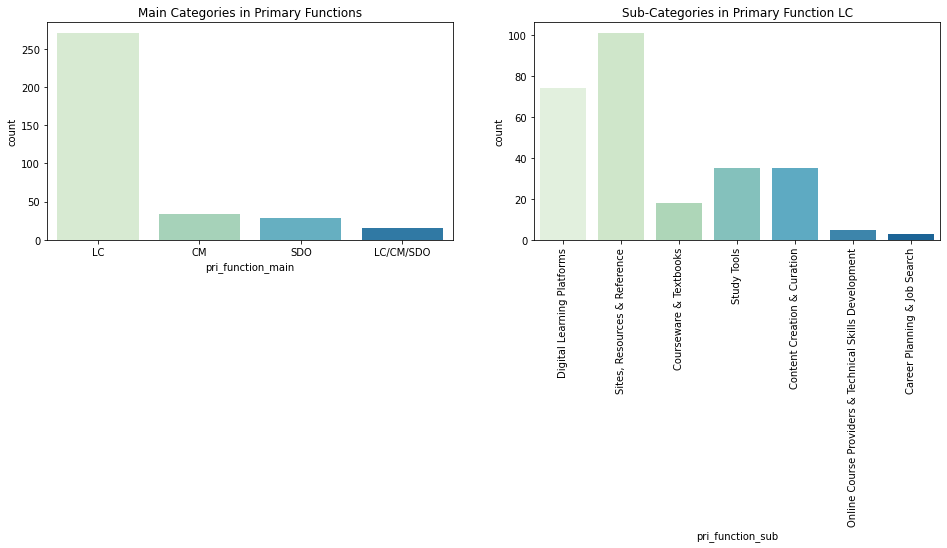

In [39]:
#countplot으로 개수 찍어보기

fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.countplot(data=products_df, x='pri_function_main', palette ='GnBu', ax=ax[0])
ax[0].set_title('Main Categories in Primary Functions')

sns.countplot(data=products_df[products_df.pri_function_main == 'LC'], 
                       x='pri_function_sub', palette ='GnBu', ax=ax[1])

ax[1].set_title('Sub-Categories in Primary Function LC')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.show()

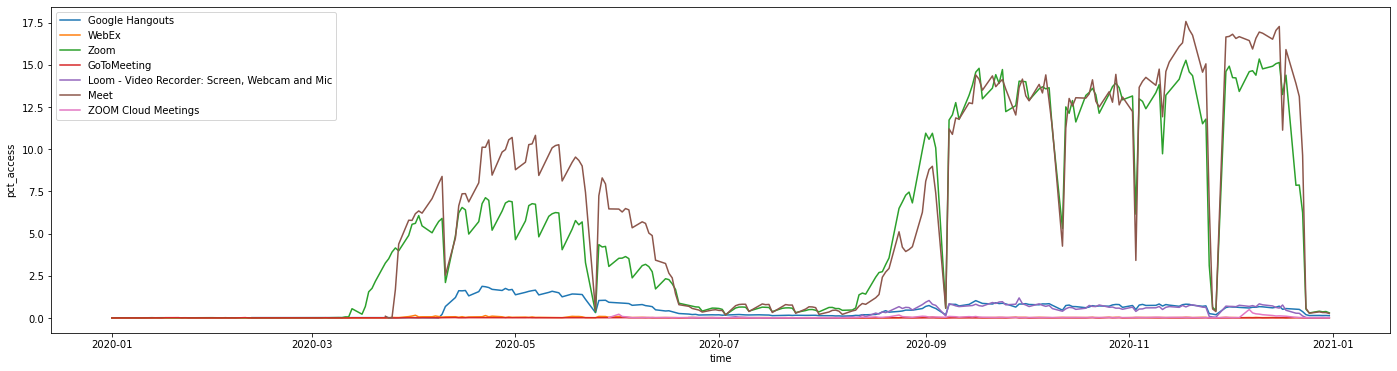

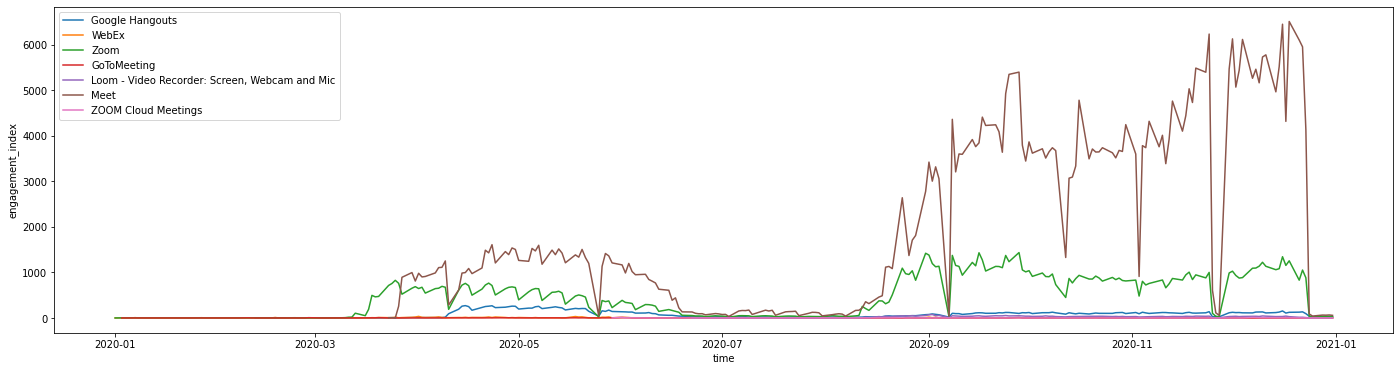

In [40]:
virtual_classroom_lp_id = products_df[
                          products_df.pri_function_sub == 'Virtual Classroom']['LP ID'].unique()

# Remove weekends from the dataframe
engagement['weekday'] = pd.DatetimeIndex(engagement['time']).weekday
engagement_without_weekends = engagement[engagement.weekday < 5]

# Figure 1
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[
            engagement_without_weekends.lp_id == virtual_classroom_product
        ].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.pct_access, 
                 label=products_df[
                 products_df['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()

# Figure 2
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for virtual_classroom_product in virtual_classroom_lp_id:
    temp = engagement_without_weekends[
            engagement_without_weekends.lp_id == virtual_classroom_product
           ].groupby('time').engagement_index.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, 
                 y=temp.engagement_index, 
                 label=products_df[
                     products_df['LP ID'] == virtual_classroom_product]['Product Name'].values[0])
plt.legend()
plt.show()

### 확인된 내용
* 홈 스쿨링은 3월 초에 시작
* 3월과 7월 사이에 종모양이 있음.
* 7월과 8월에는 여름 방학이 있으므로 참석할 수업이 없음.
* 여름 방학 이후 pct_access는 전염병 초기에 관찰된 대로 더 높은 수준으로 증가 다소 일정하게 유지
* 연중 내내 pct_access에 몇몇 하락이 모인다. 이는 공휴일 또는 기타 공휴일 가능성이 있음.
* Zoom과 Meet는 가상 교실에서 가장 인기 있는 제품.

In [41]:
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,pri_function_main,pri_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,0,0,1,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",0,0,1,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",0,0,1,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,0,1,1,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,0,0,1,LC,Digital Learning Platforms


In [42]:
display(products_df.sum())

display(products_df.groupby('pri_function_main')['pri_function_sub'].value_counts().to_frame())

LP ID                                                             20136352
URL                      https://www.splashmath.comhttps://abcmouse.com...
Product Name             SplashLearnABCmouse.comABCya!ALEKSAchieve3000A...
Provider/Company Name    StudyPad Inc.Age of Learning, Inc ABCya.com, L...
sector_Corporate                                                       115
sector_HigherEd                                                        179
sector_PreK-12                                                         348
dtype: object

pri_function_sub
pri_function_main pri_function_sub                                                    
CM                Classroom Engagement & Instruction                                20
                  Teacher Resources                                                  7
                  Virtual Classroom                                                  7
LC                Sites, Resources & Reference                                     101
                  Digital Learning Platforms                                        74
                  Content Creation & Curation                                       35
                  Study Tools                                                       35
                  Courseware & Textbooks                                            18
                  Online Course Providers & Technical Skills Deve...                 5
                  Career Planning & Job Search                                       3
LC/CM/SDO         Other                                                             16
SDO               Data, Analytics & Reporting                                       11
                  Learning Management Systems (LMS)                                  5
                  Human Resources                                                    4
                  School Management Software                                         4
                  Large-Scale & Standardized Testing                                 2
                  Admissions, Enrollment & Rostering                                 1
                  Environmental, Health & Safety (EHS) Compliance                    1
                  Other                                                              1

### Summary
* 달성하고자 하는 바에 따라 신중하게 구역을 사전 선택하는 것이 좋다.
* 노트북에서 접근하는 방식이 개인의 목적에 맞지 않을 수도 있음.
* 디지털 학습을 볼 때 실제로 디지털 학습을 적용한 학군을 파악하는데 시간을 할애할 수 있음.